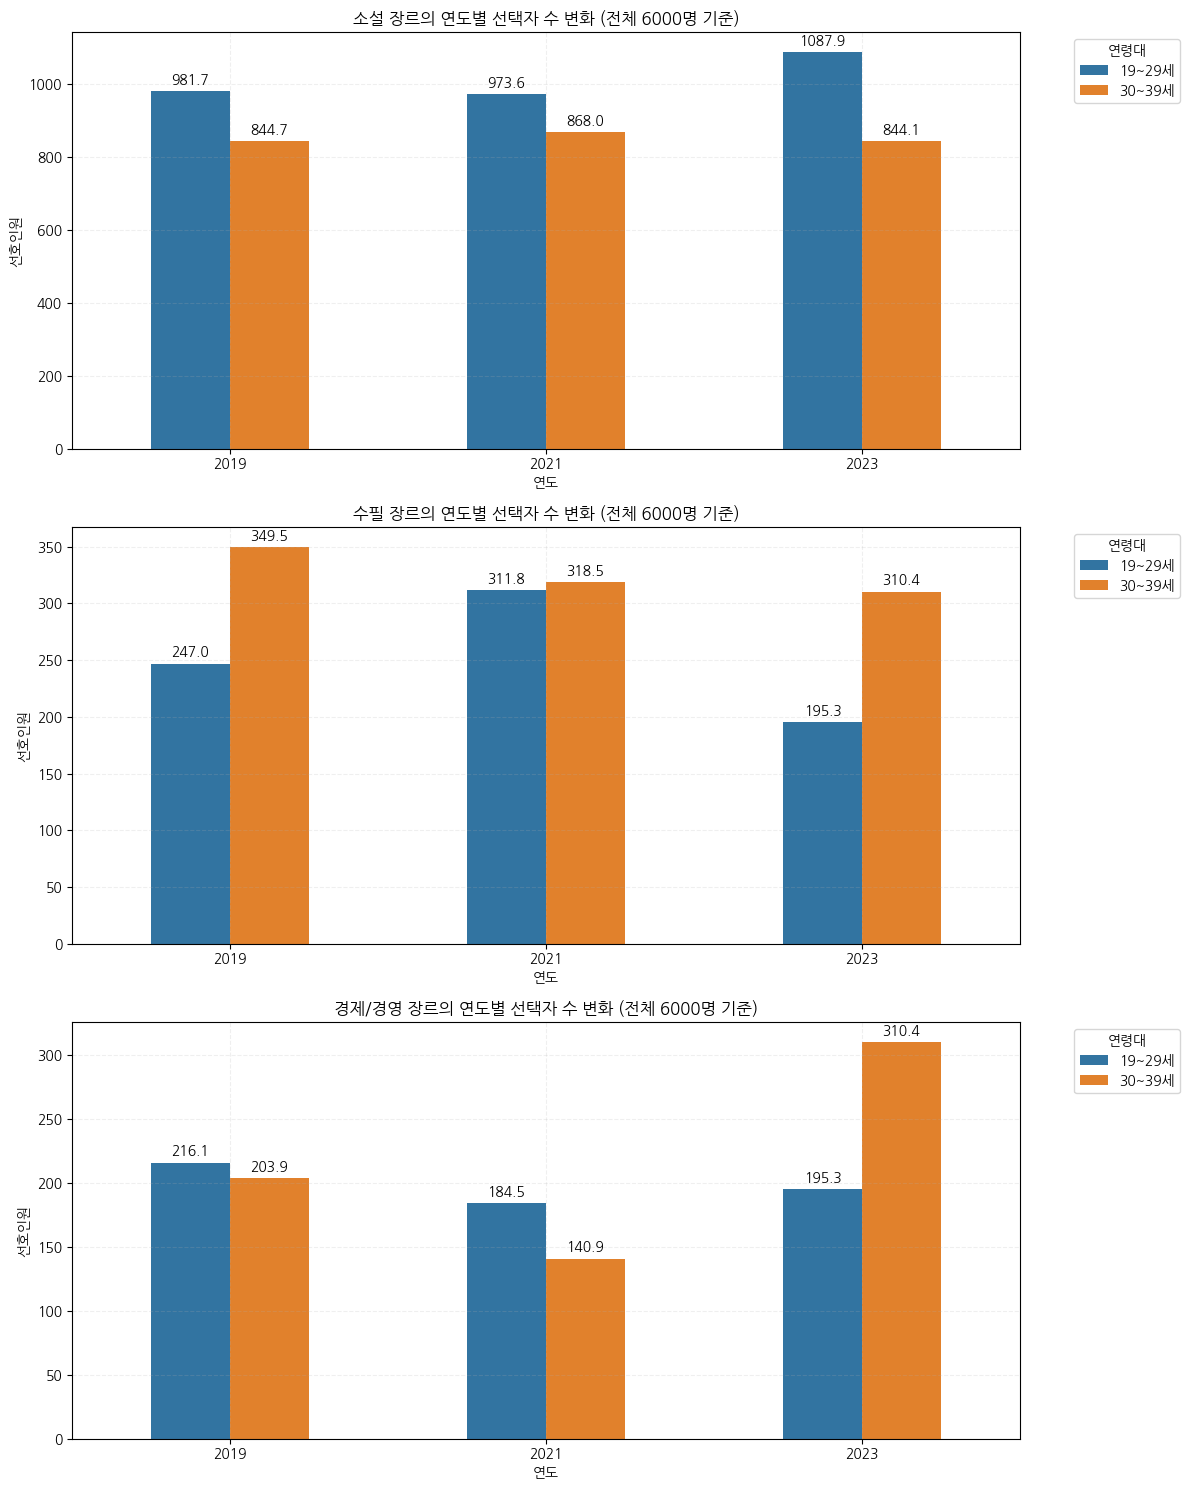

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. CSV 파일 불러오기
df = pd.read_csv("도서_연령별_선호도_사례수포함.csv")

# ✅ 2. 사용할 연령대만 필터링
target_groups = ["19~29세", "30~39세"]
df = df[df["구분"].isin(target_groups + ["전체"])]

# 3. 전체 사례수 기준 설정
TARGET_TOTAL_SAMPLE = 6000

# 4. 연도, 장르 정의
years = ["2019", "2021", "2023"]
genres = ["소설", "수필", "경제/경영"]

# 5. 결과 저장용 리스트
results = []

# 6. 연도별 계산
for year in years:
    total_sample = df[df["구분"] != "전체"][f"{year}_사례수"].sum()

    for _, row in df.iterrows():
        if row["구분"] == "전체":
            continue

        group = row["구분"]
        group_sample = row[f"{year}_사례수"]
        group_ratio = group_sample / total_sample
        group_adjusted_sample = group_ratio * TARGET_TOTAL_SAMPLE

        for genre in genres:
            rate = row[f"{year}_{genre}(%)"]
            estimated_selected = group_adjusted_sample * rate / 100

            results.append({
                "연도": year,
                "연령대": group,
                "장르": genre,
                "선호인원": round(estimated_selected, 2)
            })

# 7. DataFrame 생성
df_weighted = pd.DataFrame(results)

# 8. 시각화: 장르별 subplot + 연령대별 막대 그래프
unique_genres = df_weighted['장르'].unique()
plt.figure(figsize=(12, 5 * len(unique_genres)))

for i, genre in enumerate(unique_genres, 1):
    plt.subplot(len(unique_genres), 1, i)
    genre_df = df_weighted[df_weighted['장르'] == genre]

    ax = sns.barplot(
        data=genre_df,
        x='연도',
        y='선호인원',
        hue='연령대',
        width=0.5  # ✅ 막대 폭 줄이기
    )
    plt.grid(True, linestyle='--', alpha=0.2)
    plt.title(f"{genre} 장르의 연도별 선택자 수 변화 (전체 6000명 기준)")
    plt.ylabel("선호인원")
    plt.legend(title="연령대", bbox_to_anchor=(1.05, 1), loc="upper left")

    # ✅ 막대 위에 수치 표시
    for container in ax.containers:
        ax.bar_label(container, fmt="%.1f", label_type="edge", padding=3)

    plt.tight_layout()

plt.show()
